<a href="https://colab.research.google.com/github/awenroberts/QM2-Project/blob/main/asylum_seekers_receiving_support_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount google drive in colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#check path of file exists, print True if yes, False if not
import os

#path = "/content/drive/MyDrive/Prifysgol_UCL/2nd Year Modules/1 QM II/QM II PROJECT/Copy support-local-authority-datasets-sep-2025.xlsx"

#os.path.exists(path)


In [ ]:
import pandas as pd

#df = pd.read_excel(
  #  "/content/drive/MyDrive/Prifysgol_UCL/2nd Year Modules/1 QM II/QM II PROJECT/Copy support-local-authority-datasets-sep-2025.xlsx",
  #  sheet_name="Data_Asy_D11_2020_2025",
  #  engine="openpyxl"
#)

df = pd.read_excel(
    "/content/Copy support-local-authority-datasets-sep-2025 (2).xlsx",
    sheet_name="Data_Asy_D11",
    header=1,
    engine="openpyxl"
)
df.head()

,Date (as at…),Quarter,Year-Quarter,Support Type,UK Region / Nation,Local Authority,LAD Code,Accommodation Type,People
0,2014-03-31,Q1,2014 Q1,Section 4,N/A - Section 4 (pre-2018),N/A - Section 4 (pre-2018),N/A - Section 4 (pre-2018),Dispersal Accommodation,4854
1,2014-03-31,Q1,2014 Q1,Section 95,East Midlands,Amber Valley,E07000032,Subsistence Only,1
2,2014-03-31,Q1,2014 Q1,Section 95,East Midlands,Bassetlaw,E07000171,Subsistence Only,4
3,2014-03-31,Q1,2014 Q1,Section 95,East Midlands,Blaby,E07000129,Subsistence Only,1
4,2014-03-31,Q1,2014 Q1,Section 95,East Midlands,Broxtowe,E07000172,Dispersal Accommodation,7


In [ ]:
#check the data types
df.dtypes

,0
Date (as at…),datetime64[ns]
Quarter,object
Year-Quarter,object
Support Type,object
UK Region / Nation,object
Local Authority,object
LAD Code,object
Accommodation Type,object
People,int64


In [ ]:
#change the data types accordingly so we can work with the data usign pandas
df['Quarter']=df['Quarter'].astype('category')
df['Local Authority']=df['Local Authority'].astype('category')
df['UK Region / Nation']=df['UK Region / Nation'].astype('category')
df['LAD Code']=df['LAD Code'].astype('string')
df['Accommodation Type']=df['Accommodation Type'].astype('category')
df['People']=df['People'].astype('int64')

In [ ]:
#rename the columns to make things easier later
df = df.rename(columns={
    "Date (as at…)": "date",
    "Quarter": "quarter",
    "Year-Quarter": "year_quarter",
    "Support Type": "support_type",
    "UK Region / Nation": "region",
    "Local Authority": "local_authority",
    "LAD Code": "lad_code",
    "Accommodation Type": "accommodation_type",
    "People": "people"
})

In [ ]:
#convert the date column
df["date"] = pd.to_datetime(df["date"], errors="coerce")

#check it worked
df["date"].min(), df["date"].max()

#create proper quarterly time variable
df["year_quarter"] = df["date"].dt.to_period("Q")

In [ ]:
#make new dataframes for each support type
df_95 = df[df["support_type"] == "Section 95"].copy()
df_98 = df[df["support_type"] == "Section 98"].copy()
df_4 = df[df["support_type"] == "Section 4"].copy()


In [ ]:
#summary statistics
df_95["people"].describe()


,people
count,19099.000000
mean,135.495890
std,305.693071
min,1.000000
25%,4.000000
50%,19.000000
75%,115.000000
max,4650.000000


In [ ]:
df_95.groupby("local_authority")["people"].sum().sort_values(ascending=False)


/tmp/ipython-input-1972495405.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_95.groupby("local_authority")["people"].sum().sort_values(ascending=False)


,people
local_authority,
Glasgow City,165436
Birmingham,84411
Liverpool,77644
Cardiff,61301
Manchester,53571
...,...
Mid Ulster,1
Selby,1
N/A - Section 98 (pre-Dec 2022),0


In [ ]:
df_95.groupby("accommodation_type")["people"].sum()

/tmp/ipython-input-3443948155.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_95.groupby("accommodation_type")["people"].sum()


,people
accommodation_type,
Contingency Accommodation - Hotel,366995
Contingency Accommodation - Other,23235
Dispersal Accommodation,2010991
Initial Accommodation,14528
N/A - Section 98 (pre-2023),0
Other Accommodation,6012
Subsistence Only,161426
Subsistence only,4649


In [ ]:
df_95.groupby("year_quarter")["people"].sum()

,people
year_quarter,
2014Q1,25355
2014Q2,26720
2014Q3,27815
2014Q4,29750
2015Q1,30476
2015Q2,30457
2015Q3,31896
2015Q4,34363
2016Q1,35683


In [ ]:
df.head()

,date,quarter,year_quarter,support_type,region,local_authority,lad_code,accommodation_type,people
0,2014-03-31,Q1,2014Q1,Section 4,N/A - Section 4 (pre-2018),N/A - Section 4 (pre-2018),N/A - Section 4 (pre-2018),Dispersal Accommodation,4854
1,2014-03-31,Q1,2014Q1,Section 95,East Midlands,Amber Valley,E07000032,Subsistence Only,1
2,2014-03-31,Q1,2014Q1,Section 95,East Midlands,Bassetlaw,E07000171,Subsistence Only,4
3,2014-03-31,Q1,2014Q1,Section 95,East Midlands,Blaby,E07000129,Subsistence Only,1
4,2014-03-31,Q1,2014Q1,Section 95,East Midlands,Broxtowe,E07000172,Dispersal Accommodation,7


In [ ]:
df.describe()

,date,people
count,26135,26135.000000
mean,2021-06-20 14:09:43.768892416,120.725961
min,2014-03-31 00:00:00,1.000000
25%,2018-12-31 00:00:00,4.000000
50%,2022-03-31 00:00:00,16.000000
75%,2024-03-31 00:00:00,79.000000
max,2025-09-30 00:00:00,37142.000000
std,NaN,500.345900


In [ ]:
#get rid of the national level data and put it into a new dataframe
df = df[~df["lad_code"].str.startswith("N/A", na=False)].copy()
df_national = df[df["lad_code"].isna() | df["lad_code"].str.startswith("N/A", na=False)]

In [ ]:
df_national.head()

,date,quarter,year_quarter,support_type,region,local_authority,lad_code,accommodation_type,people
230,2014-03-31,Q1,2014Q1,Section 95,Unknown,Unknown,<NA>,Dispersal Accommodation,133
231,2014-03-31,Q1,2014Q1,Section 95,Unknown,Unknown,<NA>,Subsistence Only,25
531,2014-06-30,Q2,2014Q2,Section 95,Unknown,Unknown,<NA>,Dispersal Accommodation,127
532,2014-06-30,Q2,2014Q2,Section 95,Unknown,Unknown,<NA>,Subsistence Only,26
853,2014-09-30,Q3,2014Q3,Section 95,Unknown,Unknown,<NA>,Dispersal Accommodation,124


In [ ]:
df["date"] = pd.PeriodIndex(df["date"], freq="Q").to_timestamp()

# Sort
df = df.sort_values("date")

In [ ]:
national = (
    df.groupby(["date", "accommodation_type"])["support_type"]
      .sum()
      .reset_index()
)

pivot = national.pivot(
    index="date",
    columns="accommodation_type",
    values="support_type"
)

/tmp/ipython-input-1852002854.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["date", "accommodation_type"])["support_type"]


<Figure size 1400x800 with 0 Axes>

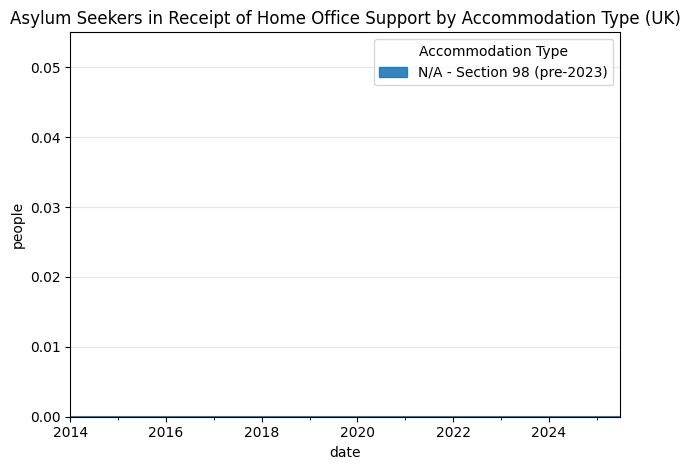

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
pivot.plot.area(stacked=True, alpha=0.9)

plt.title("Asylum Seekers in Receipt of Home Office Support by Accommodation Type (UK)")
plt.xlabel("date")
plt.ylabel("people")
plt.legend(title="Accommodation Type")
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure date is datetime
df["date"] = pd.to_datetime(df["date"])

# Filter period of interest
df_plot = df[(df["date"] >= "2019-01-01") & (df["date"] <= "2025-12-31")]

In [ ]:
national = (
    df_plot
    .groupby(["date", "accommodation_type"])["people"]
    .sum()
    .reset_index()
)

/tmp/ipython-input-1542251762.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["date", "accommodation_type"])["people"]


In [ ]:
pivot = national.pivot(
    index="date",
    columns="accommodation_type",
    values="people"
)

# Sort chronologically (important!)
pivot = pivot.sort_index()

<Figure size 1400x800 with 0 Axes>

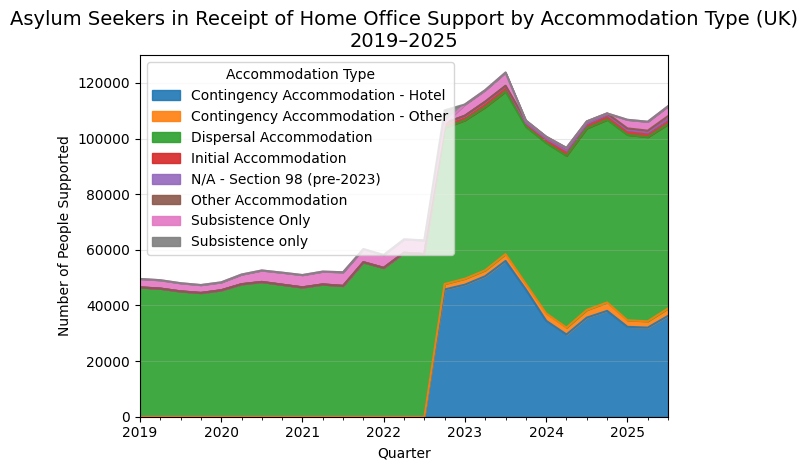

In [ ]:
plt.figure(figsize=(14,8))

pivot.plot.area(stacked=True, alpha=0.9)

plt.title(
    "Asylum Seekers in Receipt of Home Office Support by Accommodation Type (UK)\n2019–2025",
    fontsize=14
)
plt.xlabel("Quarter")
plt.ylabel("Number of People Supported")
plt.legend(title="Accommodation Type")
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

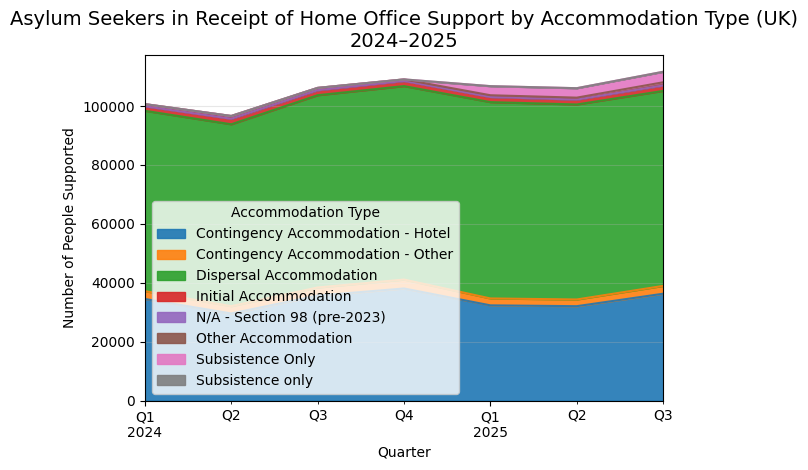

In [ ]:
# Filter to 2024–2025 only
pivot_2425 = pivot.loc["2024-01-01":"2025-12-31"]

plt.figure(figsize=(14,8))
pivot_2425.plot.area(stacked=True, alpha=0.9)

plt.title(
    "Asylum Seekers in Receipt of Home Office Support by Accommodation Type (UK)\n2024–2025",
    fontsize=14
)
plt.xlabel("Quarter")
plt.ylabel("Number of People Supported")
plt.legend(title="Accommodation Type")
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

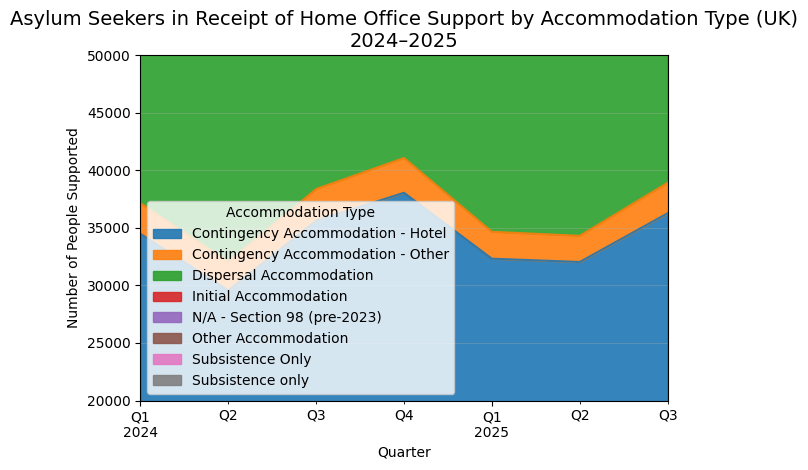

In [ ]:
plt.figure(figsize=(14,8))
pivot_2425.plot.area(stacked=True, alpha=0.9)

plt.title(
    "Asylum Seekers in Receipt of Home Office Support by Accommodation Type (UK)\n2024–2025",
    fontsize=14
)
plt.xlabel("Quarter")
plt.ylabel("Number of People Supported")
plt.legend(title="Accommodation Type")
plt.grid(axis="y", alpha=0.3)

# Set y-axis limit
plt.ylim(20000, 50000)

plt.tight_layout()
plt.show()

In [ ]:
# Convert counts to proportions (row-wise)
pivot_prop = pivot_2425.div(pivot_2425.sum(axis=1), axis=0) * 100

<Figure size 1400x800 with 0 Axes>

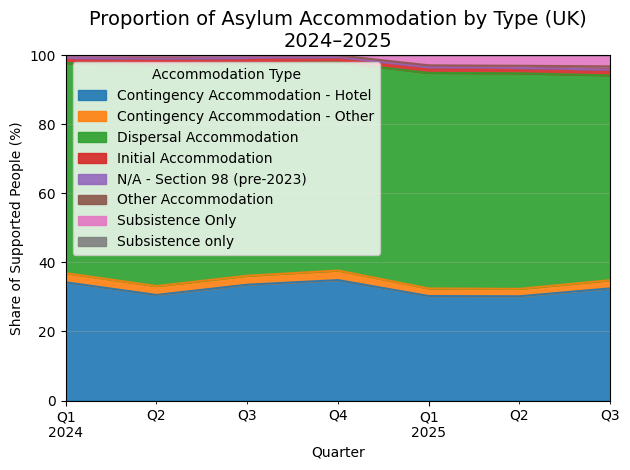

In [ ]:
plt.figure(figsize=(14,8))
pivot_prop.plot.area(stacked=True, alpha=0.9)

plt.title("Proportion of Asylum Accommodation by Type (UK)\n2024–2025", fontsize=14)
plt.xlabel("Quarter")
plt.ylabel("Share of Supported People (%)")
plt.legend(title="Accommodation Type")
plt.grid(axis="y", alpha=0.3)

plt.ylim(0, 100)

plt.tight_layout()
plt.show()